---
## **Remove bias and create a High Dimensional Dataset**
---

<font size="2">Eudald Sangenis  

The objective of this file is to create a High Dimensional dataset removing the bias of the 2 magnitude signals.

Parameters High Dimensional Dataset:  
- type_dataset: train, test 
- data_dataset:  2022_03_17 (Chico), 2022_04_25 (Chico), 2022_07_27 (Austin)
- window_number: 100, 200</font>

---
## **<font size="5">1. Libraries: </font>**
---

In [1]:
import math
import numpy as np
import pandas as pd  
from tqdm import tqdm                   
import seaborn as sns
import scipy.io as spio
import matplotlib.pyplot as plt

---
## **<font size="5">2. Parameters to modify</font>**
---

In [2]:
type_dataset = 'exp800'       
data_dataset = '2023_08_30' 
window_number = 400          # 50 100 200 400

In [3]:
# Folder to read the labeled and HD datasets:
dataset_path_unlabeled = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

In [4]:
# Folder to save HD datsets:
save_dataset_path = 'G:\\Shared drives\\NIST-Pedestrian Activity Classification\\motion classification\\6_HD_6sig_SVM_Paper_Results\\HD_datasets\\'+data_dataset+'\\'

---
## **<font size="5">3. Load HD datasets:</font>**
---

In [5]:
print('Reading dataset '+data_dataset+' ...')
# Load the HD dataset
df   = pd.read_csv(dataset_path_unlabeled + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'.csv')
print('Reading done!')

if 'Unnamed: 0' in df:   df   = df.drop(['Unnamed: 0'], axis=1)

print('Shapes df:')
print(df.shape)

Reading dataset 2023_08_30 ...
Reading done!
Shapes df:
(72407, 2406)


In [6]:
df.head(2)

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,-0.002282,0.036161,-0.982269,0.002690,0.001292,-0.021956,0.001243,0.034938,-0.978653,0.002432,...,-0.980751,0.004735,-0.000351,-0.019196,-0.000387,0.032107,-0.980945,0.002490,-0.00057,-0.020520
1,0.001243,0.034938,-0.978653,0.002432,0.001395,-0.022115,0.001579,0.035264,-0.979132,0.000059,...,-0.980945,0.002490,-0.000570,-0.020520,-0.002862,0.033268,-0.981373,0.001935,-0.00120,-0.023816


---
## **<font size="5">4. Remove Bias:</font>**
---

<font size="2">Compute the bias of the first 800 values (1s) of the labeled datset:</font>

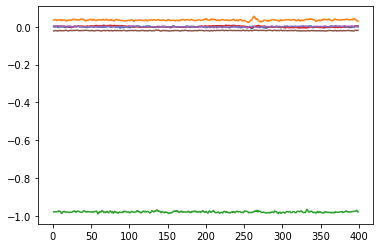

In [7]:
plt.plot(df.index[1:400],  df[['acc1_t'+str(window_number),'acc2_t'+str(window_number),'acc3_t'+str(window_number),'gyro1_t'+str(window_number),'gyro2_t'+str(window_number),'gyro3_t'+str(window_number)]].iloc[1:400])

In [8]:
bias_acc_1 = np.mean(df['acc1_t'+str(window_number)].iloc[1:400])
bias_acc_2 = np.mean(df['acc2_t'+str(window_number)].iloc[1:400])
bias_acc_3 = np.mean(df['acc3_t'+str(window_number)].iloc[1:400])
bias_gyr_1 = np.mean(df['gyro1_t'+str(window_number)].iloc[1:400])
bias_gyr_2 = np.mean(df['gyro2_t'+str(window_number)].iloc[1:400])
bias_gyr_3 = np.mean(df['gyro3_t'+str(window_number)].iloc[1:400])
[bias_acc_1, bias_acc_2, bias_acc_3, bias_gyr_1, bias_gyr_2, bias_gyr_3]

[-0.0011329327602983873,
 0.0351159629135316,
 -0.97985127785468,
 0.0004964937343358412,
 0.0001993909774436082,
 -0.020638411027568904]

<AxesSubplot:>

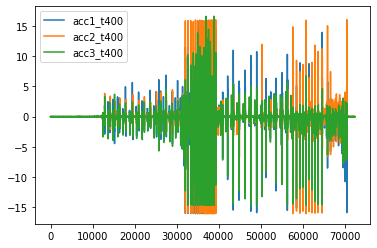

In [9]:
for i in range(0,window_number+1):
    df[f'acc1_t{i}']  = df[f'acc1_t{i}']  - bias_acc_1
    df[f'gyro1_t{i}'] = df[f'gyro1_t{i}'] - bias_gyr_1
    df[f'acc2_t{i}']  = df[f'acc2_t{i}']  - bias_acc_2
    df[f'gyro2_t{i}'] = df[f'gyro2_t{i}'] - bias_gyr_2
    df[f'acc3_t{i}']  = df[f'acc3_t{i}']  - bias_acc_3
    df[f'gyro3_t{i}'] = df[f'gyro3_t{i}'] - bias_gyr_3

df.plot(y = ['acc1_t'+str(window_number), 'acc2_t'+str(window_number), 'acc3_t'+str(window_number)], use_index = True)

<AxesSubplot:>

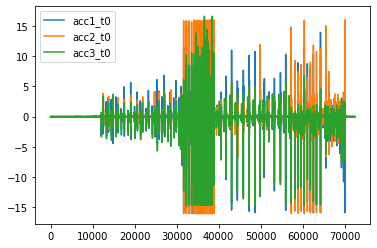

In [10]:
df.plot(y = ['acc1_t0', 'acc2_t0', 'acc3_t0'], use_index = True)

In [11]:
df.to_csv(save_dataset_path + 'HD_'+str(window_number)+'_6sig_'+type_dataset+'_no_Bias.csv')

In [12]:
df

,acc1_t400,acc2_t400,acc3_t400,gyro1_t400,gyro2_t400,gyro3_t400,acc1_t399,acc2_t399,acc3_t399,gyro1_t399,...,acc3_t1,gyro1_t1,gyro2_t1,gyro3_t1,acc1_t0,acc2_t0,acc3_t0,gyro1_t0,gyro2_t0,gyro3_t0
0,-0.001149,0.001045,-0.002418,0.002194,0.001093,-0.001318,0.002376,-0.000178,0.001198,0.001936,...,-0.000900,0.004239,-0.000550,0.001442,0.000746,-0.003009,-0.001094,0.001994,-0.000769,0.000118
1,0.002376,-0.000178,0.001198,0.001936,0.001196,-0.001477,0.002712,0.000148,0.000720,-0.000437,...,-0.001094,0.001994,-0.000769,0.000118,-0.001729,-0.001848,-0.001521,0.001439,-0.001399,-0.003178
2,0.002712,0.000148,0.000720,-0.000437,0.002874,-0.000995,-0.000375,0.002512,0.000129,-0.000131,...,-0.001521,0.001439,-0.001399,-0.003178,-0.006700,0.002593,-0.005616,0.003360,-0.000113,-0.003234
3,-0.000375,0.002512,0.000129,-0.000131,0.002662,0.000279,0.001184,0.001187,0.000679,0.002696,...,-0.005616,0.003360,-0.000113,-0.003234,-0.003563,0.004559,-0.002754,0.002999,-0.000807,-0.002331
4,0.001184,0.001187,0.000679,0.002696,0.003261,-0.000099,0.002223,-0.002082,0.001015,0.001130,...,-0.002754,0.002999,-0.000807,-0.002331,-0.001332,0.003500,0.000770,0.002241,0.000611,0.000435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72402,-0.005315,0.010640,-0.002734,-0.001655,-0.002971,-0.000442,-0.003104,0.007676,-0.001909,-0.002568,...,0.003724,0.002431,-0.002669,-0.000525,-0.006456,0.010569,0.005527,0.002013,-0.003146,-0.000630
72403,-0.003104,0.007676,-0.001909,-0.002568,-0.001201,0.000596,-0.002687,0.009795,0.004865,-0.001375,...,0.005527,0.002013,-0.003146,-0.000630,-0.007576,0.012708,0.002675,0.001364,-0.000394,-0.001052
72404,-0.002687,0.009795,0.004865,-0.001375,0.000164,0.001613,-0.004042,0.012881,0.004774,0.001352,...,0.002675,0.001364,-0.000394,-0.001052,-0.004469,0.012219,0.001921,0.001413,-0.000928,0.000278
72405,-0.004042,0.012881,0.004774,0.001352,0.000129,0.001022,-0.005824,0.012260,0.002339,0.001081,...,0.001921,0.001413,-0.000928,0.000278,-0.001801,0.011730,-0.000432,-0.000823,-0.002746,0.000869
